# tsfreshのサンプル

https://qiita.com/studio_haneya/items/b1757a68cd286a579d37

In [ ]:
pip install tsfresh

In [ ]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()
timeseries

In [ ]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(6,12))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 21].plot(subplots=True, sharex=True, figsize=(6,12))
plt.show()

In [ ]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")
extracted_features

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)
features_filtered

In [ ]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')
features_filtered_direct

# データセット作成

In [29]:
import pandas as pd
import numpy as np

# サンプルデータを作成
start_date = pd.Timestamp('2023-02-01')
end_date = pd.Timestamp('2023-02-28')
dates = pd.date_range(start_date, end_date, freq='D')
item_ids = ['{:04}'.format(i) for i in range(1, 2501)]
store_id = '001'
sales = 1
data = []
for date in dates:
    for item_id in item_ids:
        data.append([date, store_id, item_id, sales])
    sales += 1
df = pd.DataFrame(data, columns=['timestamp', 'store_id', 'item_id', 'sales'])

# データの確認
print(df.shape)
print(df.head())
print(df.tail())

(70000, 4)
   timestamp store_id item_id  sales
0 2023-02-01      001    0001      1
1 2023-02-01      001    0002      1
2 2023-02-01      001    0003      1
3 2023-02-01      001    0004      1
4 2023-02-01      001    0005      1
       timestamp store_id item_id  sales
69995 2023-02-28      001    2496     28
69996 2023-02-28      001    2497     28
69997 2023-02-28      001    2498     28
69998 2023-02-28      001    2499     28
69999 2023-02-28      001    2500     28


In [30]:
df[df.item_id=='0001']

,timestamp,store_id,item_id,sales
0,2023-02-01,001,0001,1
2500,2023-02-02,001,0001,2
5000,2023-02-03,001,0001,3
7500,2023-02-04,001,0001,4
10000,2023-02-05,001,0001,5
12500,2023-02-06,001,0001,6
15000,2023-02-07,001,0001,7
17500,2023-02-08,001,0001,8
20000,2023-02-09,001,0001,9
22500,2023-02-10,001,0001,10


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

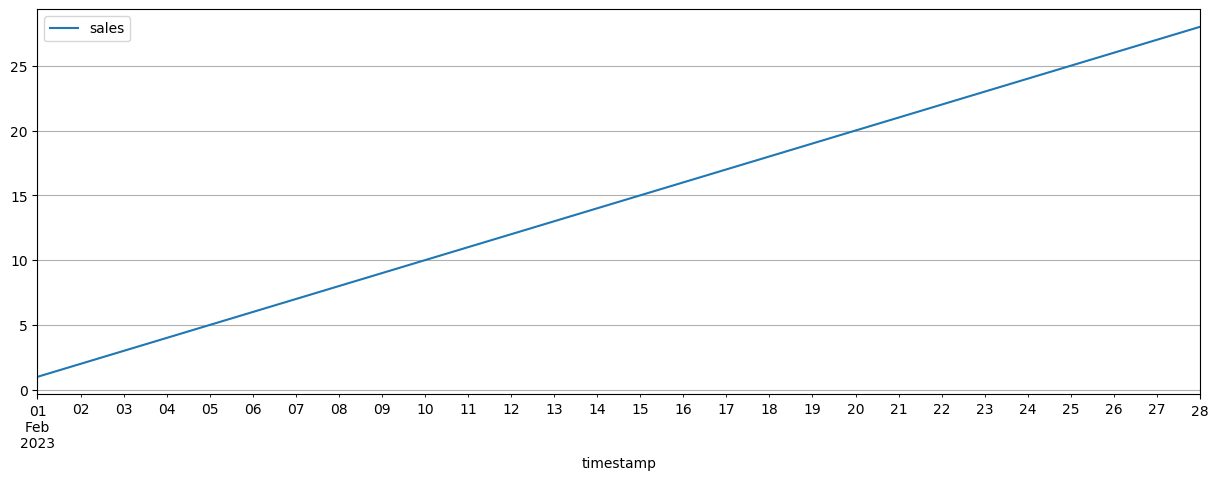

In [41]:
df[df.item_id=='0001'].plot(x='timestamp', y='sales', grid=True, figsize=(15,5))

In [47]:
df.to_csv('sample_pos.csv', index=False)